In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
! pip install keras

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

In [91]:
import tensorflow as tf

In [72]:
forest_fires = pd.read_csv("C://data science//data sets//forestfires.csv")

In [73]:
forest_fires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [74]:
#As dummy variables are already created, we will remove the month and alsoday columns
forest_fires.drop(["month","day"],axis=1,inplace = True)


In [75]:
forest_fires["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [76]:
forest_fires.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [77]:
forest_fires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
##I am taking small as 0 and large as 1
forest_fires.loc[forest_fires["size_category"]=='small','size_category']=0

In [79]:
forest_fires.loc[forest_fires["size_category"]=='large','size_category']=1

In [80]:
forest_fires["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [81]:
#Normalization being done.
def norm_func(i):
     x = (i-i.min())	/	(i.max()	-	i.min())
     return (x)

In [82]:
predictors = forest_fires.iloc[:,0:28]

In [83]:
target = forest_fires.iloc[:,28]

In [84]:
predictors1 = norm_func(predictors)
data = pd.concat([predictors1,target],axis=1)

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(predictors1,target, test_size=0.3,stratify = target)

In [86]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model

In [87]:
def show_shapes(): # can make yours to take inputs; this'll use local variable values
    print("Expected: (num_samples, timesteps, channels)")
    print("Sequences: {}".format(Sequences.shape))
    print("Targets:   {}".format(Targets.shape))   

In [88]:
first_model = prep_model([28,50,40,20,1])


In [94]:
first_model.fit(np.array(x_train).astype(np.float32),np.array(y_train).astype(np.float32),epochs=500)

Epoch 1/500
12/12 [==============================] - 2s 1ms/step - loss: 0.6819 - accuracy: 0.6735
Epoch 2/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6382 - accuracy: 0.7339
Epoch 3/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6217 - accuracy: 0.7085
Epoch 4/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5823 - accuracy: 0.7401
Epoch 5/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5914 - accuracy: 0.7242
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5628 - accuracy: 0.7498
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.7259
Epoch 8/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5805 - accuracy: 0.7291
Epoch 9/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.7293
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.7471
Epoch 11/

In [98]:
pred_train = first_model.predict(np.array(x_train).astype(np.float32))

In [99]:
#Converting the predicted values to series 
pred_train = pd.Series([i[0] for i in pred_train])

In [100]:
size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"


In [102]:
train = pd.concat([x_train,y_train],axis =1)

0    264
1     97
Name: size_category, dtype: int64

In [104]:
train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
38,0.927742,0.146795,0.796294,0.119430,0.501608,0.141176,0.400000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
218,0.957419,0.455548,0.811188,0.163993,0.553055,0.047059,0.100000,0.0,0.029079,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
51,0.922581,0.339421,0.730972,0.112299,0.620579,0.223529,0.200000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.949677,0.302550,0.571948,0.151515,0.704180,0.141176,0.300000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
342,0.939355,0.444521,0.937258,0.133690,0.591640,0.258824,0.155556,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.947097,0.522054,0.762636,0.254902,0.630225,0.482353,0.300000,0.0,0.000477,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
488,0.985806,0.483115,0.701184,0.315508,0.553055,0.658824,0.800000,0.0,0.042811,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
313,0.953548,0.393866,0.902076,0.156863,0.710611,0.141176,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [103]:
train["size_category"].value_counts()

0    264
1     97
Name: size_category, dtype: int64

In [105]:
#For training data
from sklearn.metrics import confusion_matrix
train["original_class"] = "small"
train.loc[train["size_category"]==1,"original_class"] = "large"
train.original_class.value_counts()

small    264
large     97
Name: original_class, dtype: int64

In [106]:
confusion_matrix(pred_train_class,train["original_class"])

array([[ 93,   0],
       [  4, 264]], dtype=int64)

In [107]:
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True))

0.9889196675900277

In [108]:
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))


original_class,large,small
row_0,,
large,93,0
small,4,264


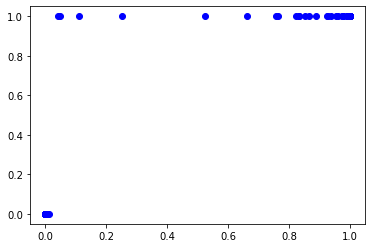

In [120]:
#Visualising 
plt.plot(pred_train,y_train,"bo")

In [109]:
#For test data
pred_test = first_model.predict(np.array(x_test))

In [110]:
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*156)
pred_test_class[[i>0.5 for i in pred_test]] = "large"

In [111]:
test =pd.concat([x_test,y_test],axis=1)

In [112]:
test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
82,0.981935,0.369400,0.749619,0.303030,0.527331,0.423529,0.455556,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
203,0.938065,0.126809,0.780931,0.092692,0.578778,0.258824,0.255556,0.0,0.012559,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
409,0.949677,0.327705,0.518705,0.215686,0.681672,0.188235,0.555556,0.0,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
238,0.952258,0.413508,0.781635,0.153298,0.736334,0.141176,0.400000,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
256,0.974194,0.400069,0.672218,0.196078,0.697749,0.305882,0.200000,0.0,0.007352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0.909677,0.092350,0.073766,0.112299,0.440514,0.235294,0.400000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
179,0.904516,0.503790,0.711387,0.160428,0.392283,0.600000,0.555556,0.0,0.004794,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
83,0.947097,0.379394,0.757828,0.171123,0.463023,0.376471,0.055556,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
443,0.929032,0.274983,0.422657,0.299465,0.405145,0.741176,0.844444,0.0,0.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [113]:
test["original_class"]="small"
test.loc[test["size_category"]==1,"original_class"] = "large"

In [114]:
test["original_class"].value_counts()

small    114
large     42
Name: original_class, dtype: int64

In [115]:
np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True))

0.8974358974358975

In [116]:
confusion_matrix(pred_test_class,test["original_class"])

array([[ 26,   0],
       [ 16, 114]], dtype=int64)

In [117]:
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
large,26,0
small,16,114


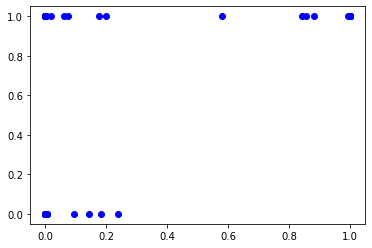

In [121]:
##Visualizing
plt.plot(pred_test,y_test,"bo")